In [1]:
import matplotlib.pyplot as plt
import numpy as np

from trendfilterpy._estimator import TrendFilterRegression

rng = np.random.default_rng()

In [35]:
n = 10000
X = np.hstack([rng.integers(-100, 100, size=(n, 1)) / 10, rng.integers(-250, 250, size=(n, 1)) / 250])
true_y = 5 + np.sin(X[:, 0]) + np.exp(X[:, 1])
obs_y = true_y + 0.5 * rng.standard_normal(n)

model = TrendFilterRegression(lam=100)
model.fit(X, obs_y)

TrendFilterRegression(lam=100)

Text(0, 0.5, 'Linear Predictor')

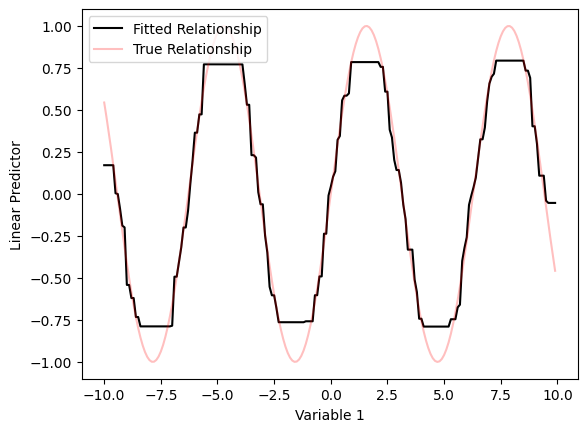

In [36]:
var = model.vars_[0]
plt.plot(var.unique_vals, var.beta, color="black")
plt.plot(var.unique_vals, np.sin(var.unique_vals), alpha=0.25, color="red")
plt.legend(["Fitted Relationship", "True Relationship"])
plt.xlabel("Variable 1")
plt.ylabel("Linear Predictor")

Text(0, 0.5, 'Linear Predictor')

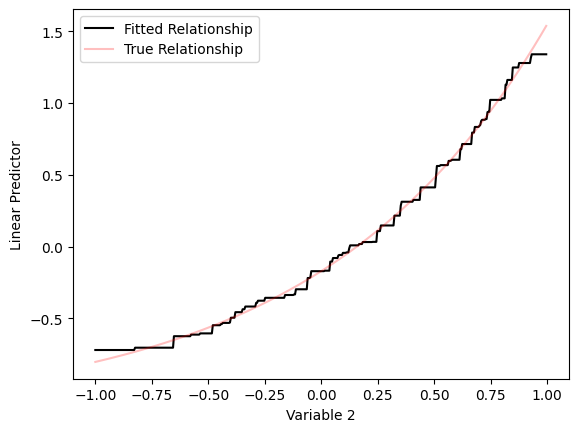

In [37]:
var = model.vars_[1]
plt.plot(var.unique_vals, var.beta, color="black")
# Make adjustment for identifiability
plt.plot(var.unique_vals, np.exp(var.unique_vals) - (model.intercept_ - 5), alpha=0.25, color="red")
plt.legend(["Fitted Relationship", "True Relationship"])
plt.xlabel("Variable 2")
plt.ylabel("Linear Predictor")

In [19]:
model.score(X, obs_y)

0.7745232702283554